In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [71]:
data=pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Fliprobo assignment_5/cardio_train.csv',sep=';')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
data.shape

(69301, 13)

In [ ]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [72]:
data['age']=data['age']/365

In [73]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


In [ ]:
data.dtypes

id               int64
age            float64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
data.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

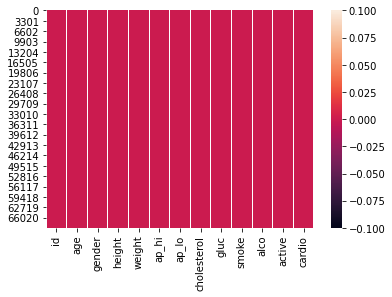

In [5]:
import seaborn as sns
sns.heatmap(data.isnull())

In [6]:
#counting target variables
from collections import Counter
Counter(data['cardio'])

Counter({0: 34679, 1: 34622})

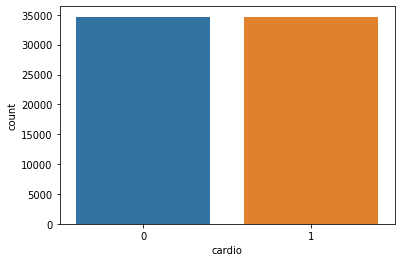

In [7]:
#plotting target variables
sns.countplot(x='cardio',data=data)

In [8]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,53.339140,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.759621,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.427397,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


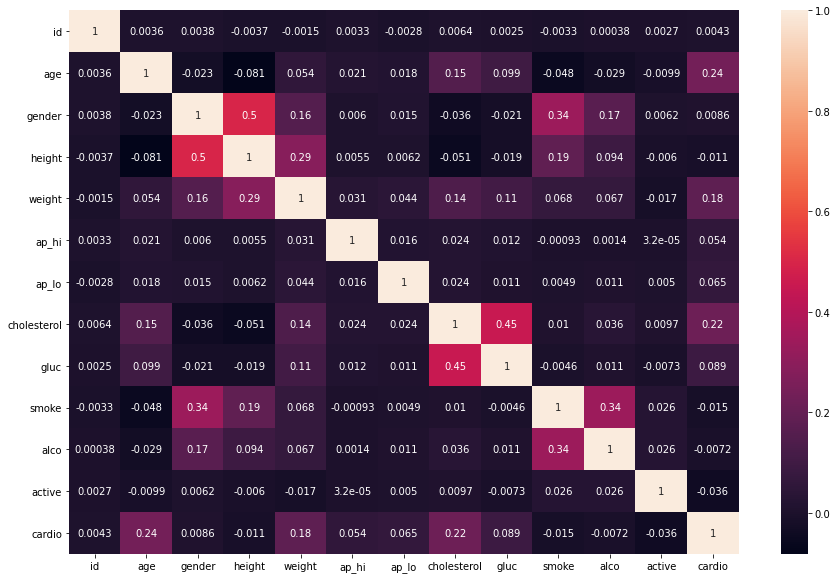

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,)

In [ ]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
data.columns

Index(['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio'],
      dtype='object')

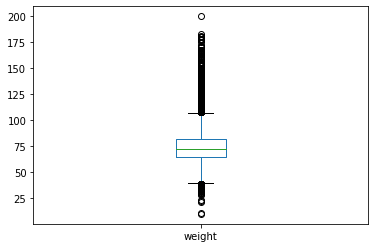

In [ ]:
data['weight'].plot.box()

In [ ]:
x = np.std(data['weight'])

print(x)

14.38336516450327


In [ ]:
#data['ap_hi'].plot.box()

In [ ]:
#data['age'].plot.box()

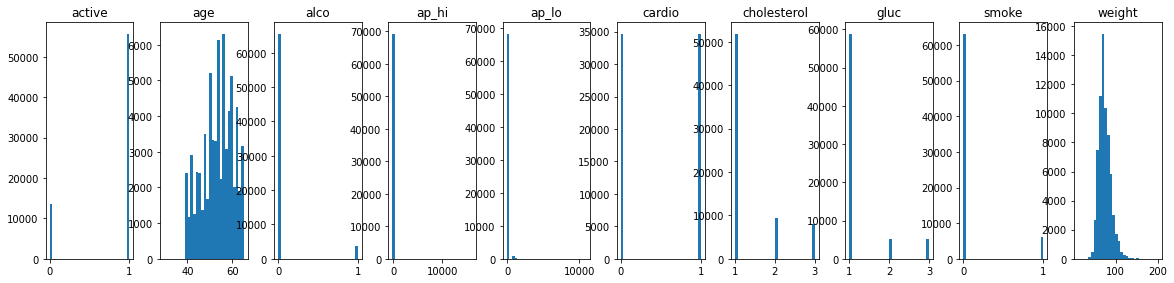

In [ ]:
data.hist(figsize=(20,10), grid = False, layout=(2,10), bins = 30)
plt.show()

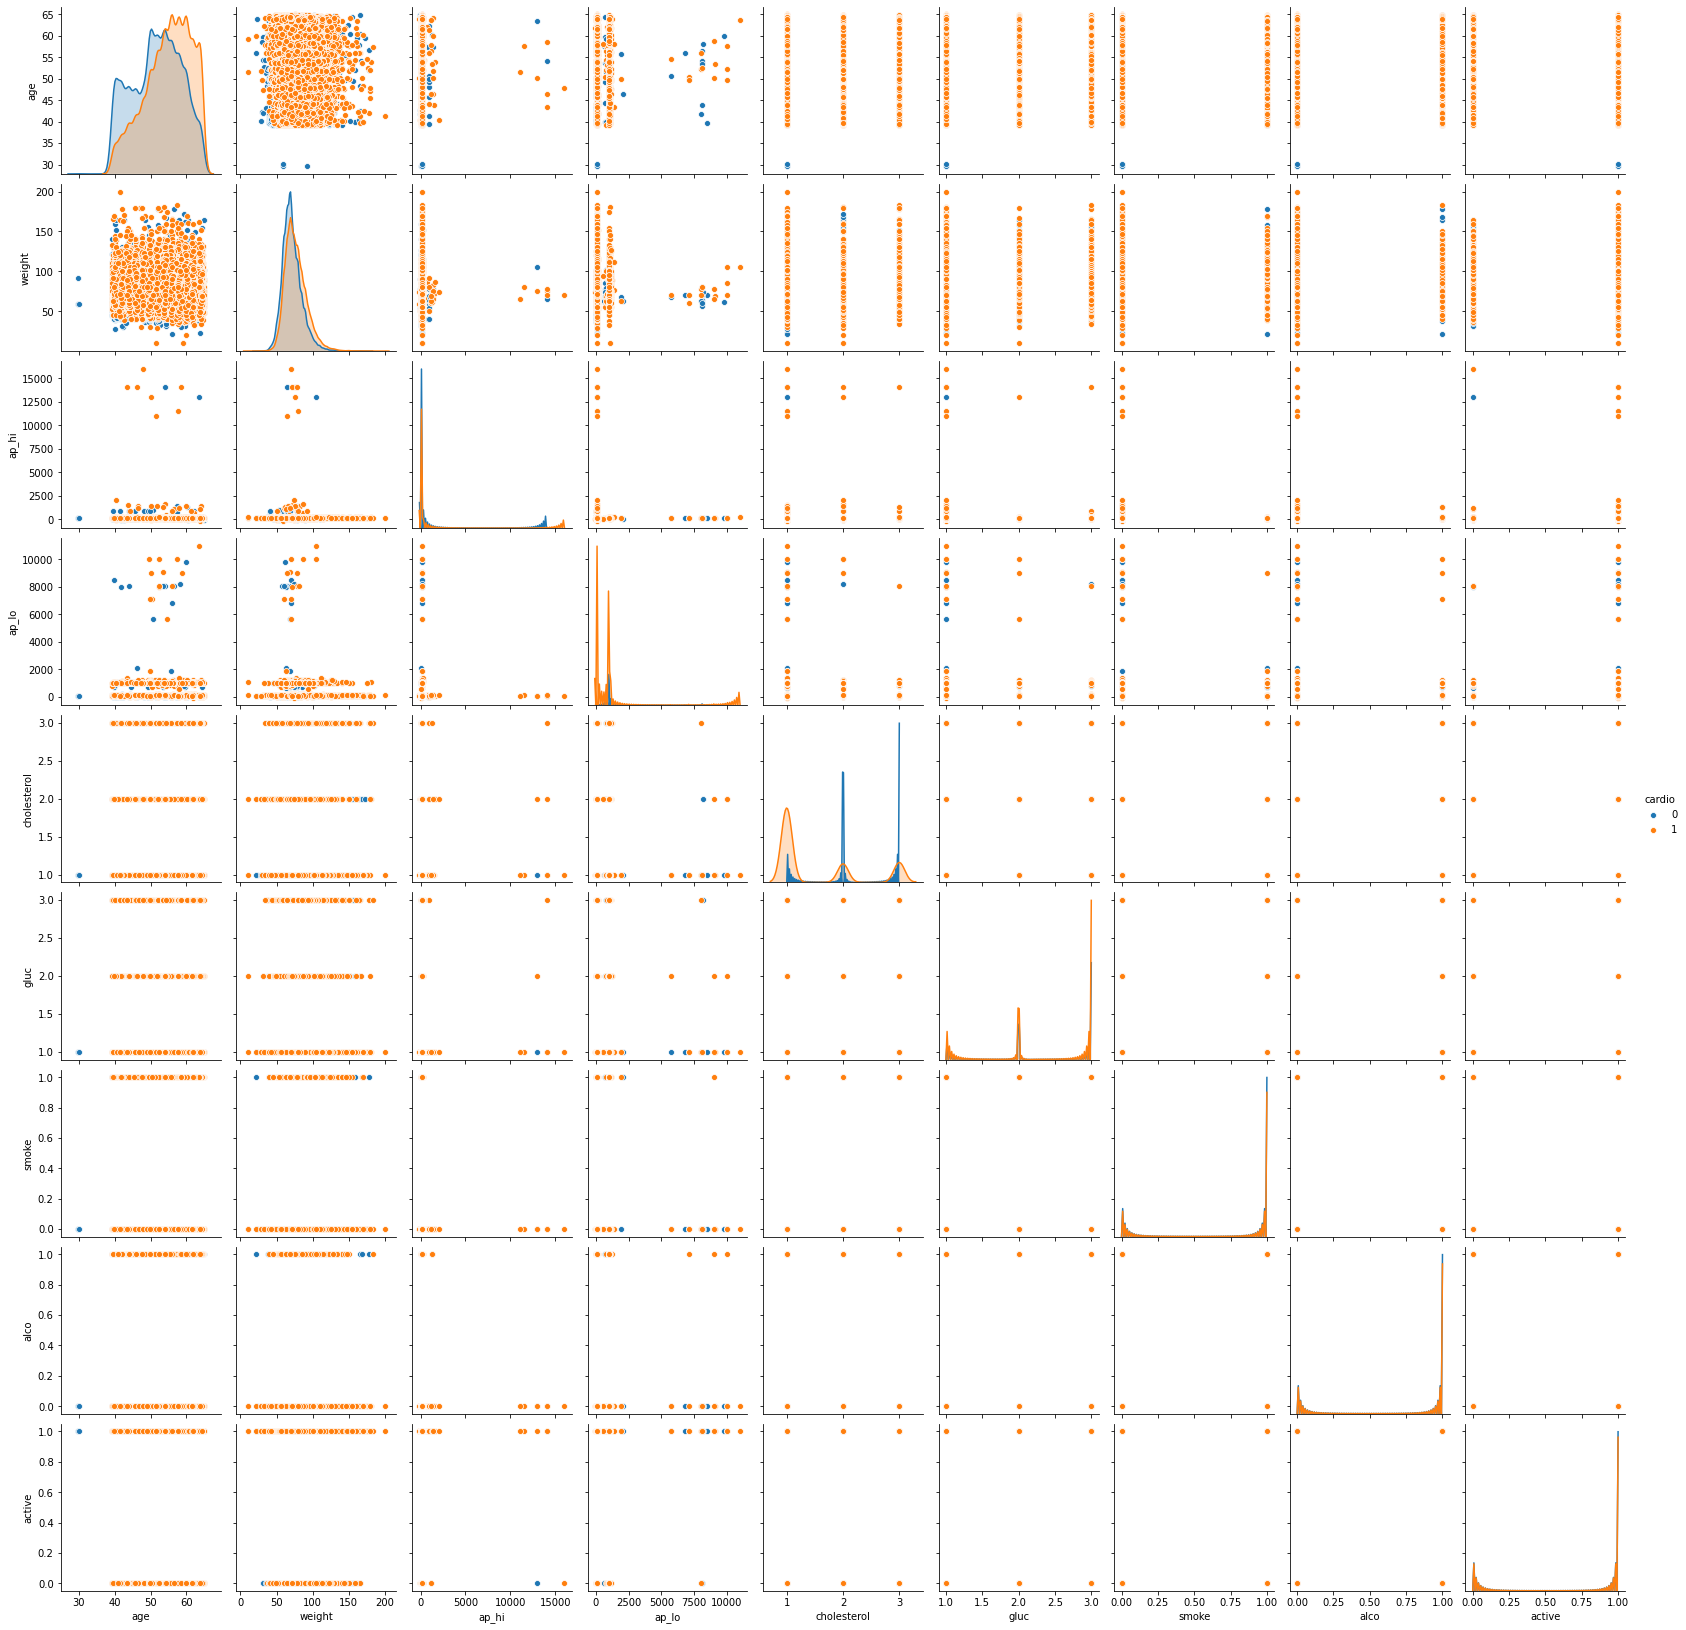

In [ ]:
sns.pairplot(data,hue='cardio')

In [74]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z

array([[1.73243929, 1.21601824, 0.73302344, ..., 0.23864069, 0.49376463,
        0.99917784],
       [1.73240428, 1.95391548, 0.73302344, ..., 0.23864069, 0.49376463,
        1.00082284],
       [1.73236927, 0.98580185, 0.73302344, ..., 0.23864069, 0.49376463,
        0.99917784],
       ...,
       [1.7338761 , 0.16325352, 1.36421285, ..., 4.19040018, 2.02525646,
        1.00082284],
       [1.73394612, 1.20061644, 0.73302344, ..., 0.23864069, 2.02525646,
        1.00082284],
       [1.73398113, 0.43417421, 0.73302344, ..., 0.23864069, 0.49376463,
        0.99917784]])

In [75]:
threshold=3
print(np.where(z>3))
df=data[(z<3).all(axis=1)]
df.shape

(array([    3,     3,    13, ..., 69296, 69297, 69298]), array([ 9, 10,  8, ...,  9,  4, 10]))


(55140, 13)

In [12]:
#splitting the data
x=df.drop('cardio',axis=1)

In [13]:
x.shape

(55140, 12)

In [14]:
y=df['cardio']

In [15]:
y.shape

(55140,)

In [17]:
#Train and Test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(44112, 12)
(11028, 12)
(44112,)
(11028,)


In [19]:
#Implementation of ml models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()

In [20]:
models=[lg,knn,dtc,gnb,rfc]

In [21]:
# Dictionary of pipelines and classifier types for ease of reference
model_dict = {0: 'Logistic Regression', 1: 'KNeighbors', 2: 'DecisionTreeClassifier',3:'GaussianNB',4:'RandomForestClassifier'}

# Fit the pipelines
for i in models:
	i.fit(x_train, y_train)

In [22]:
for i,model in enumerate(models):
    print("{} Test Accuracy: {}".format(model_dict[i],model.score(x_test,y_test)*100))

Logistic Regression Test Accuracy: 72.55168661588684
KNeighbors Test Accuracy: 69.38701487123686
DecisionTreeClassifier Test Accuracy: 63.384113166485314
GaussianNB Test Accuracy: 69.84040623866522
RandomForestClassifier Test Accuracy: 72.53355096118969


In [ ]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

72.55168661588684
[[4565 1117]
 [1910 3436]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      5682
           1       0.75      0.64      0.69      5346

    accuracy                           0.73     11028
   macro avg       0.73      0.72      0.72     11028
weighted avg       0.73      0.73      0.72     11028



In [25]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

72.47007616974973
[[4370 1312]
 [1724 3622]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      5682
           1       0.73      0.68      0.70      5346

    accuracy                           0.72     11028
   macro avg       0.73      0.72      0.72     11028
weighted avg       0.73      0.72      0.72     11028



Boosting

In [26]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=rfc,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
accuracy = np.round(accuracy_score(pred,y_test),2)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7275117881755532


Roc Curve

In [28]:
#roc-curve
from sklearn.metrics import roc_curve
y_pred_prob=model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.43, 0.56, 0.71, ..., 0.49, 0.45, 0.92])

In [29]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [30]:
print(fpr)
print(tpr)
print(thresholds)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.75994368e-04
 3.51988736e-04 1.23196058e-03 1.75994368e-03 3.51988736e-03
 5.27983105e-03 7.74375220e-03 1.24956001e-02 1.47835269e-02
 1.65434706e-02 1.97113692e-02 2.55191834e-02 2.92150651e-02
 3.55508624e-02 4.01267159e-02 4.54065470e-02 4.96304118e-02
 5.36782823e-02 5.82541359e-02 6.30059838e-02 6.67018655e-02
 7.03977473e-02 7.55015839e-02 7.95494544e-02 8.27173530e-02
 8.71172122e-02 9.09890883e-02 9.41569870e-02 9.83808518e-02
 1.02252728e-01 1.08412531e-01 1.14924322e-01 1.19676170e-01
 1.25131996e-01 1.30235832e-01 1.34283703e-01 1.41675466e-01
 1.48011264e-01 1.55931010e-01 1.64730729e-01 1.71242520e-01
 1.77050334e-01 1.86202042e-01 1.93945794e-01 2.02041535e-01
 2.08905315e-01 2.18057022e-01 2.27560718e-01 2.36184442e-01
 2.46568110e-01 2.56423794e-01 2.68215417e-01 2.78071102e-01
 2.89334741e-01 3.00950370e-01 3.14325942e-01 3.26469553e-01
 3.39141147e-01 3.51636748e-01 3.66420275e-01 3.79443858e-01
 3.95283351e-01 4.102428

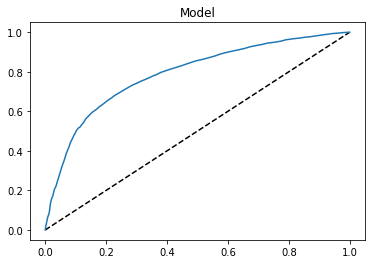

In [31]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="lg")
plt.title("Model")
plt.show()

Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
clf =  GridSearchCV(lg,{'C': [1,10,20]},cv=10, return_train_score=False)
clf.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [1, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
accuracy=clf.best_score_

In [ ]:
accuracy

0.7261334784185709

In [ ]:
clf.best_params_

{'C': 20}

In [ ]:
lg=LogisticRegression(C=20)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

72.55168661588684
[[4565 1117]
 [1910 3436]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      5682
           1       0.75      0.64      0.69      5346

    accuracy                           0.73     11028
   macro avg       0.73      0.72      0.72     11028
weighted avg       0.73      0.73      0.72     11028



Feature selection

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [77]:
df.shape

(55140, 13)

In [78]:
#splitting the data
x=df.drop('cardio',axis=1)
y=df['cardio']

In [79]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)

In [80]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [81]:

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [82]:
featureScores

,Specs,Score
0,id,0.260303
1,age,3524.926545
2,gender,18.677279
3,height,8.996277
4,weight,1809.927998
5,ap_hi,10332.200683
6,ap_lo,5983.256705
7,cholesterol,2562.378967
8,gluc,174.984184
9,smoke,NaN


In [83]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs         Score
5         ap_hi  10332.200683
6         ap_lo   5983.256705
1           age   3524.926545
7   cholesterol   2562.378967
4        weight   1809.927998
8          gluc    174.984184
11       active     76.246262
2        gender     18.677279
3        height      8.996277
0            id      0.260303


In [84]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [85]:
df.drop(['id','height','gender','active','smoke','alco'],axis=1,inplace=True)

In [86]:
df.columns

Index(['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'cardio'], dtype='object')

In [87]:
#splitting the data
x=df.drop('cardio',axis=1)
y=df['cardio']

In [88]:
#Train and Test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [89]:
# Now applying the Normalisation on the train and test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [90]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

72.52448313384113
[[4555 1127]
 [1903 3443]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      5682
           1       0.75      0.64      0.69      5346

    accuracy                           0.73     11028
   macro avg       0.73      0.72      0.72     11028
weighted avg       0.73      0.73      0.72     11028



In [105]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

73.06855277475518
[[4545 1137]
 [1833 3513]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      5682
           1       0.76      0.66      0.70      5346

    accuracy                           0.73     11028
   macro avg       0.73      0.73      0.73     11028
weighted avg       0.73      0.73      0.73     11028



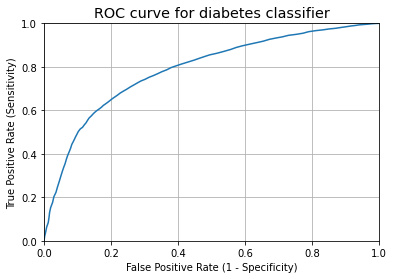

In [115]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [106]:
y_test.value_counts()

0    5682
1    5346
Name: cardio, dtype: int64

In [107]:
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.484766050054407

In [108]:
# calculate the percentage of zeros
1 - y_test.mean()

0.515233949945593

In [109]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.515233949945593

In [110]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.515234
Name: cardio, dtype: float64

In [111]:
# this produces a 2x2 numpy array (matrix)
from sklearn import metrics
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.515234
Name: cardio, dtype: float64

In [114]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', pred[0:25])

True: [0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1]
Pred: [0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0]


Model saving

In [116]:
from sklearn.externals import joblib
#saving the model as pickl
joblib.dump(knn,"Cardio_data.pkl")

['Cardio_data.pkl']

In [119]:
x= joblib.load('Cardio_data.pkl')
model_pred=x.predict(x_test)
model_pred

array([0, 0, 1, ..., 0, 0, 1])